In [1]:
# https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [7]:
df['Sleep Disorder'].isna().sum()

219

In [8]:
# Filling NaN values with 'Unknown' for categorical columns
df['Sleep Disorder'].fillna('Unknown', inplace=True)

C:\Users\Devyansh\AppData\Local\Temp\ipykernel_13472\726034408.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('Unknown', inplace=True)


In [9]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['Gender'] = encoder.fit_transform(df[['Gender']])
df['Occupation'] = encoder.fit_transform(df[['Occupation']])
df['BMI Category'] = encoder.fit_transform(df[['BMI Category']])
df['Blood Pressure'] = encoder.fit_transform(df[['Blood Pressure']])
df['Sleep Disorder'] = encoder.fit_transform(df[['Sleep Disorder']])

In [10]:
df['Sleep Disorder'].head()

0    2.0
1    2.0
2    2.0
3    1.0
4    1.0
Name: Sleep Disorder, dtype: float64

In [11]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1.0,27,9.0,6.1,6,42,6,3.0,11.0,77,4200,2.0
1,2,1.0,28,1.0,6.2,6,60,8,0.0,9.0,75,10000,2.0
2,3,1.0,28,1.0,6.2,6,60,8,0.0,9.0,75,10000,2.0
3,4,1.0,28,6.0,5.9,4,30,8,2.0,22.0,85,3000,1.0
4,5,1.0,28,6.0,5.9,4,30,8,2.0,22.0,85,3000,1.0


In [12]:
df.drop('Person ID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    float64
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    float64
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    float64
 8   Blood Pressure           374 non-null    float64
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 35.2 KB


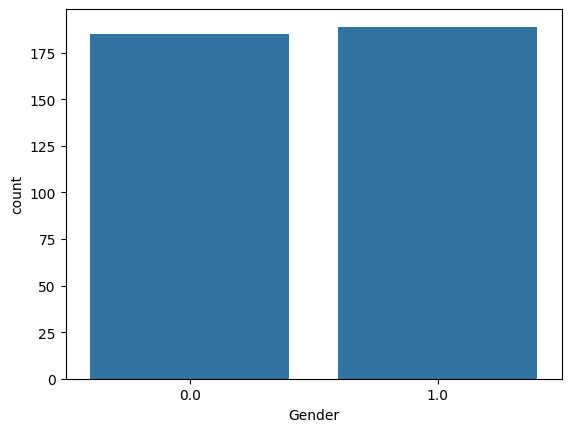

In [13]:
sns.countplot(x = "Gender", data=df)
plt.show()

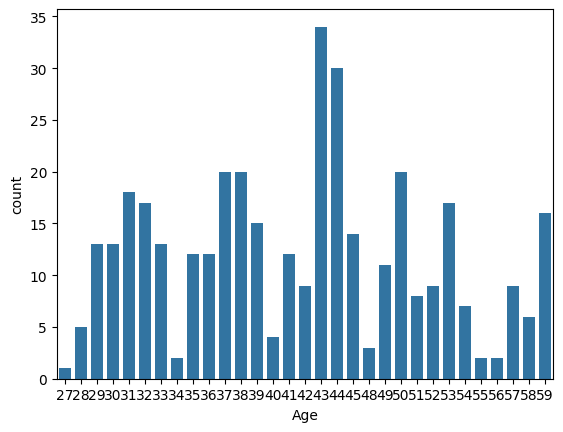

In [14]:
sns.countplot(x = "Age", data=df)
plt.show()

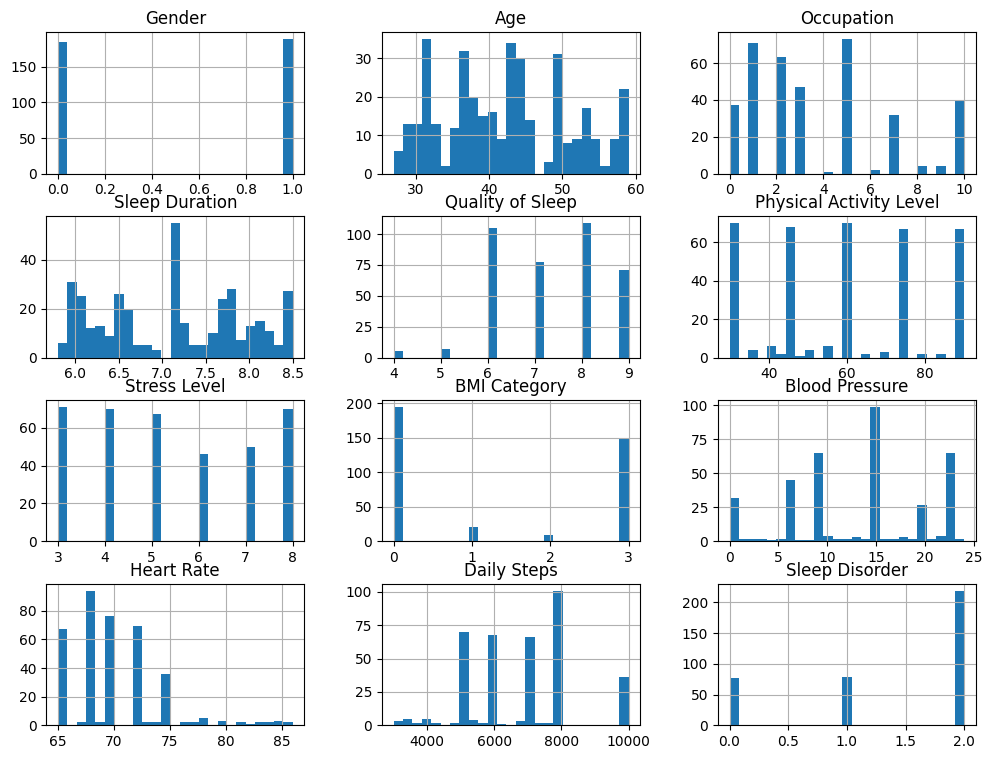

In [15]:
df.hist(bins = 25, figsize=(12,9))
plt.show()

<Axes: >

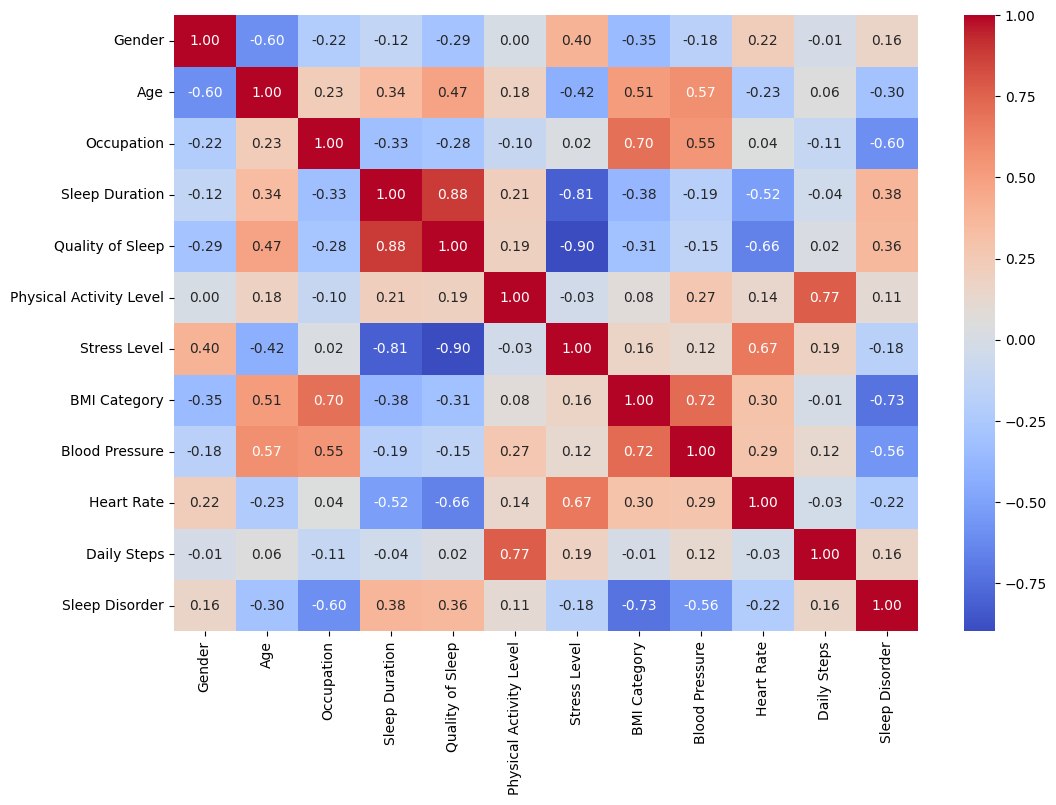

In [16]:
plt.figure(figsize=(12,8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', cbar=True)

---

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 
        'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 
        'Heart Rate', 'Daily Steps', 'Sleep Disorder']]  # Your features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_scaled)


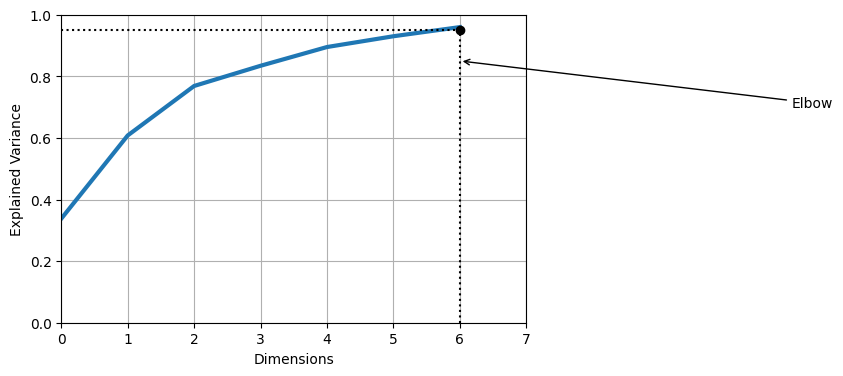

In [24]:
# Plot the cumulative explained variance
cumsum = np.cumsum(pca.explained_variance_ratio_)

# You can choose 'd' based on the point where we want to draw the vertical line (e.g., for 95% variance)
d = np.argmax(cumsum >= 0.95)  # This will give us the dimension where 95% variance is reached

# Step 5: Create the plot
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, len(cumsum), 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")  # Vertical line at 95% explained variance
plt.plot([0, d], [0.95, 0.95], "k:")  # Horizontal line at 95% explained variance
plt.plot(d, 0.95, "ko")  # Point where 95% variance is reached
plt.annotate("Elbow", xy=(d, 0.85), xytext=(d+5, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

In [25]:
d

6

In [26]:
# Get the explained variance ratio for all components
explained_variance_ratio = pca.explained_variance_ratio_

# Get the explained variance ratio for the first 'd' components (where d is the number of dimensions for 95% variance)
explained_variance_ratio_reduced = explained_variance_ratio[:d]

# Print the explained variance ratio for the reduced dimensions
print(f"Explained Variance Ratios for the first {d} components (95% variance):")
print(explained_variance_ratio_reduced)

Explained Variance Ratios for the first 6 components (95% variance):
[0.33784086 0.27016843 0.16064888 0.06558275 0.06085439 0.03502091]


In [27]:
# overall reduced variance of the data set
explained_variance_ratio_reduced.sum()

0.9301162168648207

---

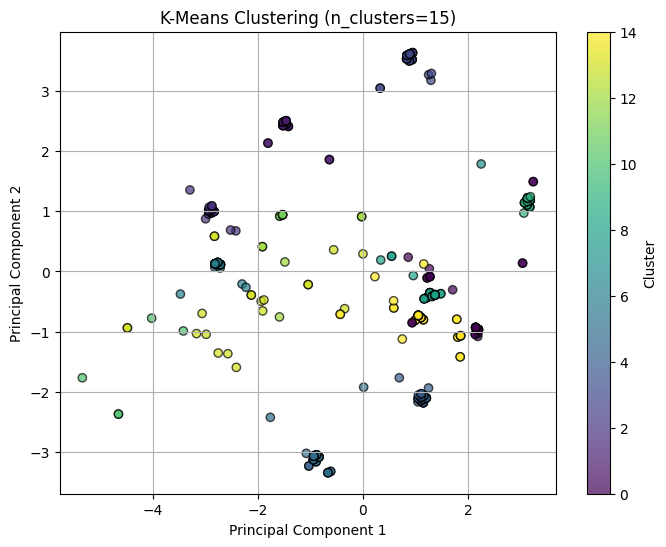

Silhouette Score for 15 clusters: 0.6919931931615113


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Step 4: Determine the number of clusters (K-Means example)
n_clusters = 15  # Choose the number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_reduced)  # Perform clustering on reduced data

# Step 6: Visualize the clustering in 2D (using the first two PCA components)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', alpha=0.7, edgecolor='k')
plt.title(f"K-Means Clustering (n_clusters={n_clusters})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Step 7: Evaluate the clustering
silhouette_avg = silhouette_score(X_reduced, clusters)
print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

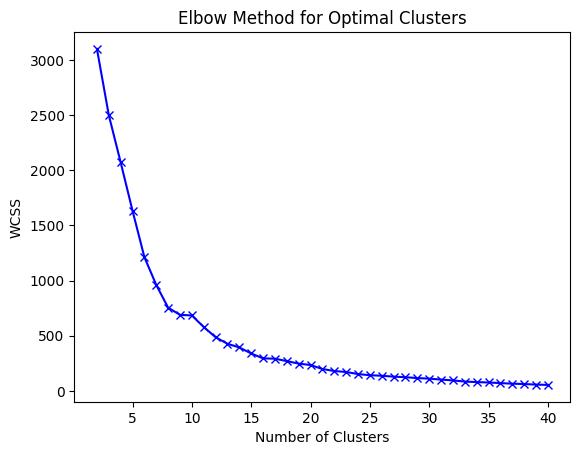

In [ ]:
wcss = []
for k in range(2, 41):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 41), wcss, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [80]:
db_score = davies_bouldin_score(X_reduced, clusters)
print("Davies-Bouldin Index:", db_score)

Davies-Bouldin Index: 0.6906115965818628


In [81]:
ch_score = calinski_harabasz_score(X_reduced, clusters)
print("Calinski-Harabasz Index:", ch_score)

Calinski-Harabasz Index: 299.48695252465336


C:\Users\Devyansh\AppData\Local\Temp\ipykernel_13472\216497917.py:27: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(2,70), sil_scores, 'bo-', linestyle='dashed')


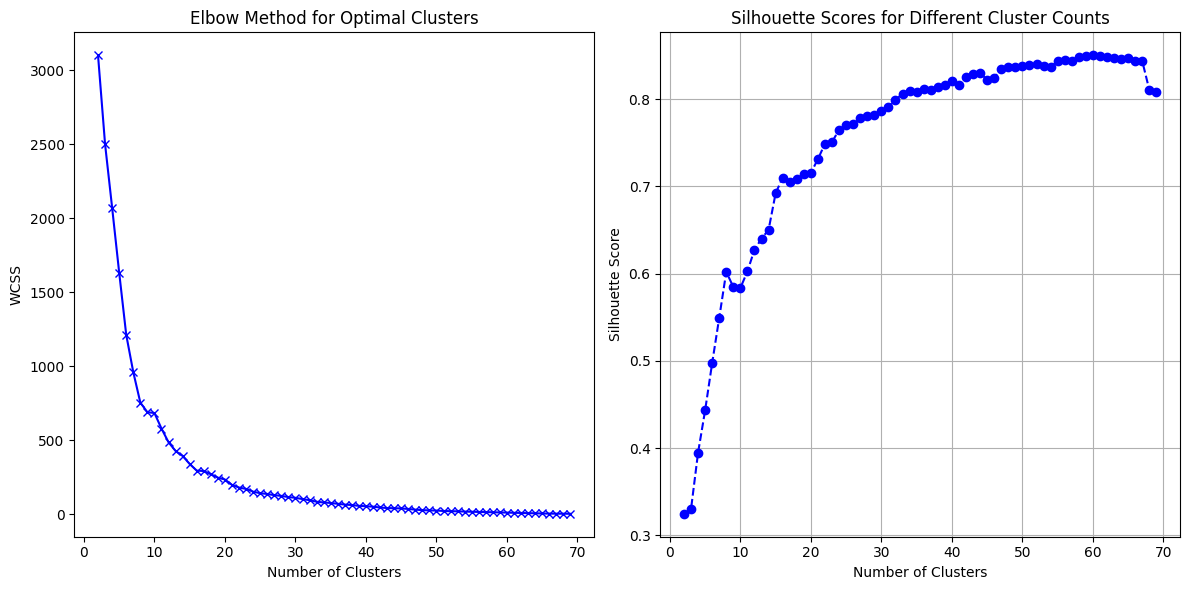

In [77]:
# List to store WCSS and Silhouette Scores
wcss = []
sil_scores = []

# Loop through different number of clusters (from 2 to 20)
for k in range(2,70):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_reduced)
    
    # Calculate WCSS (Within-Cluster Sum of Squares)
    wcss.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    sil_score = silhouette_score(X_reduced, clusters)
    sil_scores.append(sil_score)

# Plot the Elbow Curve for WCSS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2,70), wcss, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')

# Plot the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2,70), sil_scores, 'bo-', linestyle='dashed')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Cluster Counts')

plt.tight_layout()
plt.grid()
plt.show()


C:\Users\Devyansh\AppData\Local\Temp\ipykernel_13472\991957299.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(2, 21), db_scores, 'bo-', linestyle='dashed')


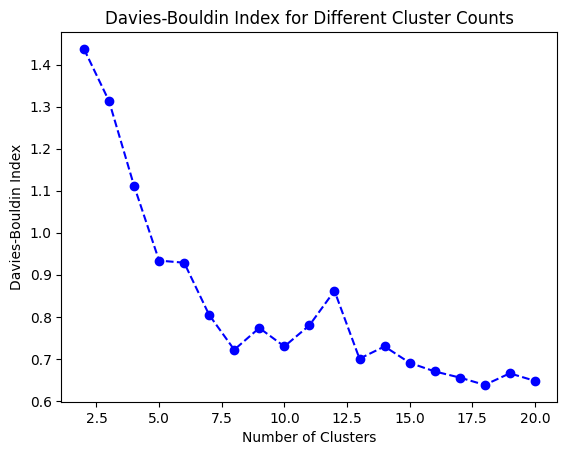

In [67]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_reduced)
    db_score = davies_bouldin_score(X_reduced, clusters)
    db_scores.append(db_score)

plt.plot(range(2, 21), db_scores, 'bo-', linestyle='dashed')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Cluster Counts')
plt.show()


C:\Users\Devyansh\AppData\Local\Temp\ipykernel_13472\1628206000.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(2, 21), ch_scores, 'bo-', linestyle='dashed')


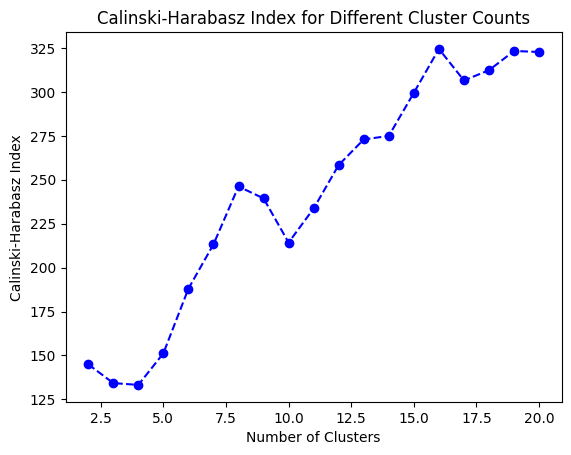

In [78]:
from sklearn.metrics import calinski_harabasz_score

ch_scores = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_reduced)
    ch_score = calinski_harabasz_score(X_reduced, clusters)
    ch_scores.append(ch_score)

plt.plot(range(2, 21), ch_scores, 'bo-', linestyle='dashed')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Different Cluster Counts')
plt.show()


---

C:\Users\Devyansh\AppData\Local\Temp\ipykernel_13472\4204490895.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced_2D[:, 0], X_reduced_2D[:, 1], alpha=0.7, edgecolor='k', cmap='viridis')


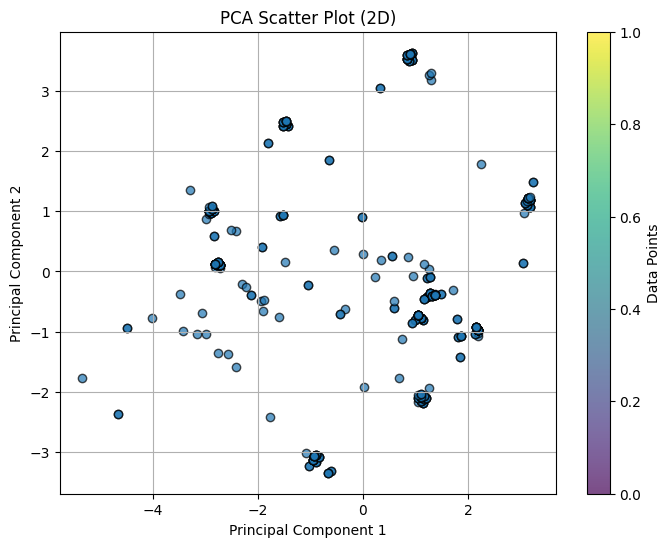

In [85]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2
pca_2 = PCA(n_components=2)
X_reduced_2D = pca_2.fit_transform(X_scaled)  # Assuming X_scaled is your preprocessed data

# Scatter plot for the 2D reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced_2D[:, 0], X_reduced_2D[:, 1], alpha=0.7, edgecolor='k', cmap='viridis')
plt.title("PCA Scatter Plot (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.colorbar(label="Data Points")
plt.show()
